In [1]:
from sympy import *

import sympy
from sympy import init_printing # Latex printing to screen
init_printing(use_latex = 'mathjax')

%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
#mpl.rcParams['text.usetex'] = True
%matplotlib inline

# If you like this one
plt.style.use('fivethirtyeight')

import numpy as np

from warnings import filterwarnings # Ignoring ugly pink warnings
filterwarnings('ignore')



# Differential Equation

## Motivation

In [2]:
def plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5),head_width=0.01,ax=None):
    
    f_np = sympy.lambdify((x, y_x), f_xy, 'numpy')
    
    x_vec = np.linspace(x_lim[0], x_lim[1], 10)
    y_vec = np.linspace(y_lim[0], y_lim[1], 10)
    
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 4))

    #dx = x_vec[1] - x_vec[0]
    #dy = y_vec[1] - y_vec[0]

    for m, xx in enumerate(x_vec):
        for n, yy in enumerate(y_vec):
            #Dy = f_np(xx, yy) * dx
            #Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
            #Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)            
            #ax.plot([xx - Dx/2, xx + Dx/2],
            #        [yy - Dy/2, yy + Dy/2], 'b', lw=0.5)
            m=f_np(xx,yy)
            h=0.25/np.sqrt(1.+m**2)
            ax.plot([xx-h,xx+h],[yy-m*h,yy+m*h],'b')
            ax.arrow(xx-h,yy-m*h,2*h,2*m*h, head_width=head_width, 
                     head_length=0.2, fc='b', ec='b')             
    ax.axis('tight')

    ax.set_title(r"$%s$" %
                 (sympy.latex(sympy.Eq(y(x).diff(x), f_xy))),
                 fontsize=18)
    
    return ax

In [3]:
x, t, C1,y0= sympy.symbols("x, t,C1, y0") # C1 is C1 NOT C_1, no need _
y = sympy.Function("y")


## Example 1: 1st Order DE

https://www.youtube.com/watch?v=cDfWtSqGiBY&list=PLUl4u3cNGP63oTpyxCMLKt_JmB0WtSZfG&index=27


https://www.youtube.com/watch?v=elMskF8Uzmg

In [4]:
ode = sympy.Eq(y(t).diff(t), 2-y(t))
ode

d                   
──(y(t)) = -y(t) + 2
dt                  

In [5]:
sol=sympy.dsolve(ode, y(t))
sol

           -t    
y(t) = C₁⋅ℯ   + 2

In [6]:
# solve C1 under initial condition with known y0 
C1_ic = solve(sol.rhs.subs({t:0})-y0,C1)[0]
C1_ic

y₀ - 2

In [7]:
sol = sol.subs({C1:C1_ic})
sol

                 -t    
y(t) = (y₀ - 2)⋅ℯ   + 2

In [8]:
f_exact = sympy.lambdify((t, y0), sol.rhs, 'numpy') # numpy funciton of t and y0
f_exact

<function numpy.<lambda>>

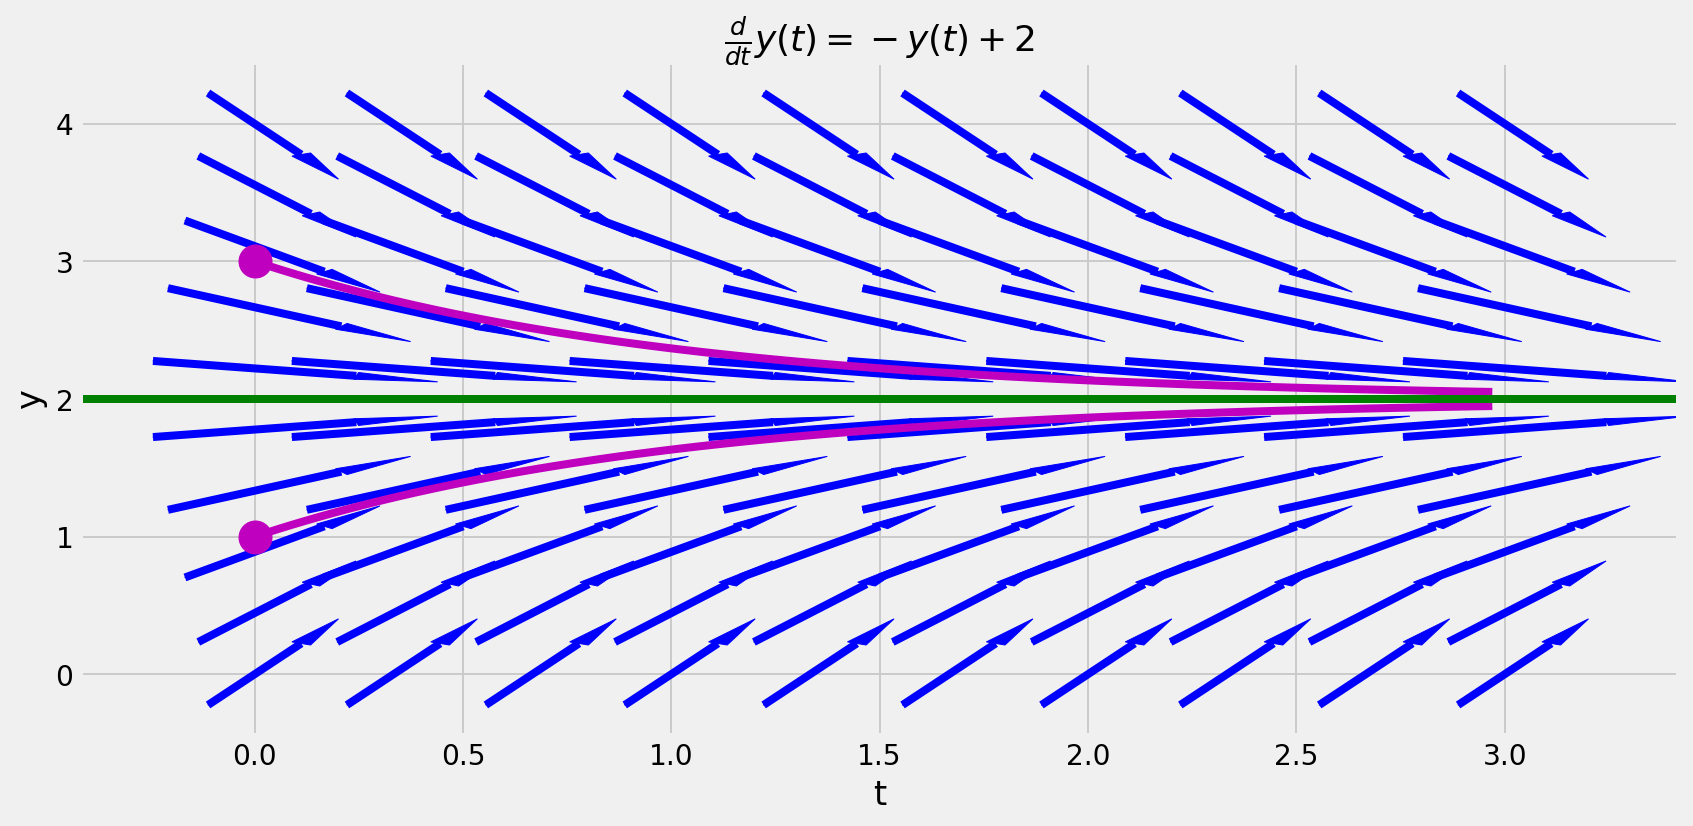

In [9]:
fig, ax = plt.subplots( figsize=(12, 6))

tl=0;tu=3;yl =0;yu=4;tstep = (tu-tl)/101

#					I. direction field
plot_direction_field(t, y(t), ode.rhs, x_lim=(tl, tu), y_lim=(yl, yu),
                     head_width=0.05, ax = ax)

#					II. Dot at given (x0,y0) and solution curve through (x0,y0)
t0=0; y00=1
ax.plot([t0],[y00],'mo',markersize = 16) # 'm'agenta d'o't
#X=np.linspace(t0,4,101)  # t[0]=t0, .., t[100]=4.
X=np.arange(t0,tu,tstep) 
#Y=[f_exact(t,y0) for t in X]
Y=f_exact(X,y00)

ax.plot(X,Y,'m',linewidth=4) # lines joining points (X[i],Y[i]), 'm'agenta

#					II. Dot at given (x0,y0) and solution curve through (x0,y0)
t0=0; y00=3
ax.plot([t0],[y00],'mo',markersize = 16) # 'm'agenta d'o't
#X=np.linspace(t0,4,101)  # t[0]=t0, .., t[100]=4.
X=np.arange(t0,tu,tstep) 
#Y=[f_exact(t,y0) for t in X]
Y=f_exact(X,y00)

ax.plot(X,Y,'m',linewidth=4) # lines joining points (X[i],Y[i]), 'm'agenta

#					III. HORIZONTAL STEADY STATE

plt.axhline(y=2, xmin=0, xmax=3, linewidth=4, color = 'g')

ax.set_xlabel("t")
ax.set_ylabel("y")

fig.tight_layout()

## Example 2: 2nd Order DE Logistic Equation

ref:

https://www.youtube.com/watch?v=swt-let4pCI

Text(0.5,1,'logistic equation')

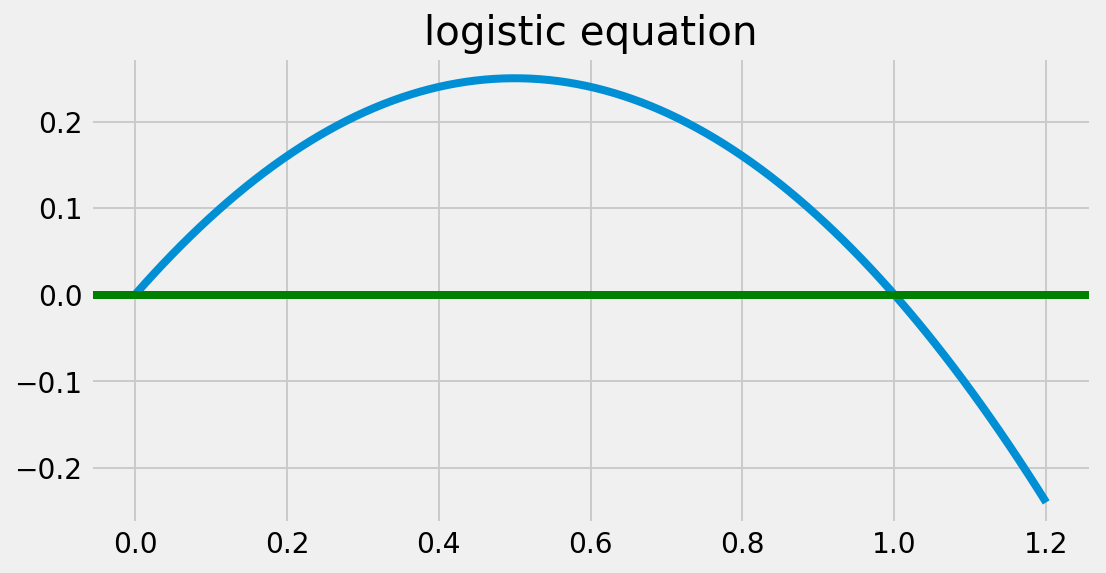

In [10]:
fig,ax = plt.subplots(figsize = (8,4))
x = np.linspace(0, 1.2, 100)
ax.plot(x, x-x**2)
ax.axhline(y=0, xmin=0, xmax=3, linewidth=4, color = 'g')
ax.set_title("logistic equation")

In [11]:
# reinitiate the symbols
x, t, C1,y0= sympy.symbols("x, t,C1, y0") # C1 is C1 NOT C_1, no need _
y = sympy.Function("y")

print("Differential equation:")
ode = sympy.Eq(y(t).diff(t), y(t)-y(t)**2)
display(ode)
#
print("General solution:")
sol = sympy.dsolve(ode, y(t))
display(sol)
# solve C1 under initial condition with known y0 
print("Solve C1 for y0:")
C1_ic = solve(sol.rhs.subs({t:0})-y0,C1)[0]
display(C1_ic)
# substitute C1 by y0
print("Solution with y0:")
sol = sol.subs({C1:C1_ic})
display(sol)
print("numpy function of t and y0")
f_exact = sympy.lambdify((t, y0), sol.rhs, 'numpy') # numpy funciton of t and y0
f_exact

Differential equation:


d             2          
──(y(t)) = - y (t) + y(t)
dt                       

General solution:


          -1     
y(t) = ──────────
           -t    
       C₁⋅ℯ   - 1

Solve C1 for y0:


y₀ - 1
──────
  y₀  

Solution with y0:


              -1        
y(t) = ─────────────────
                      -t
            (y₀ - 1)⋅ℯ  
       -1 + ────────────
                 y₀     

numpy function of t and y0


<function numpy.<lambda>>

at 0, slope is positive, and it is unstable; at 1, slope is negative, and it is stable. 

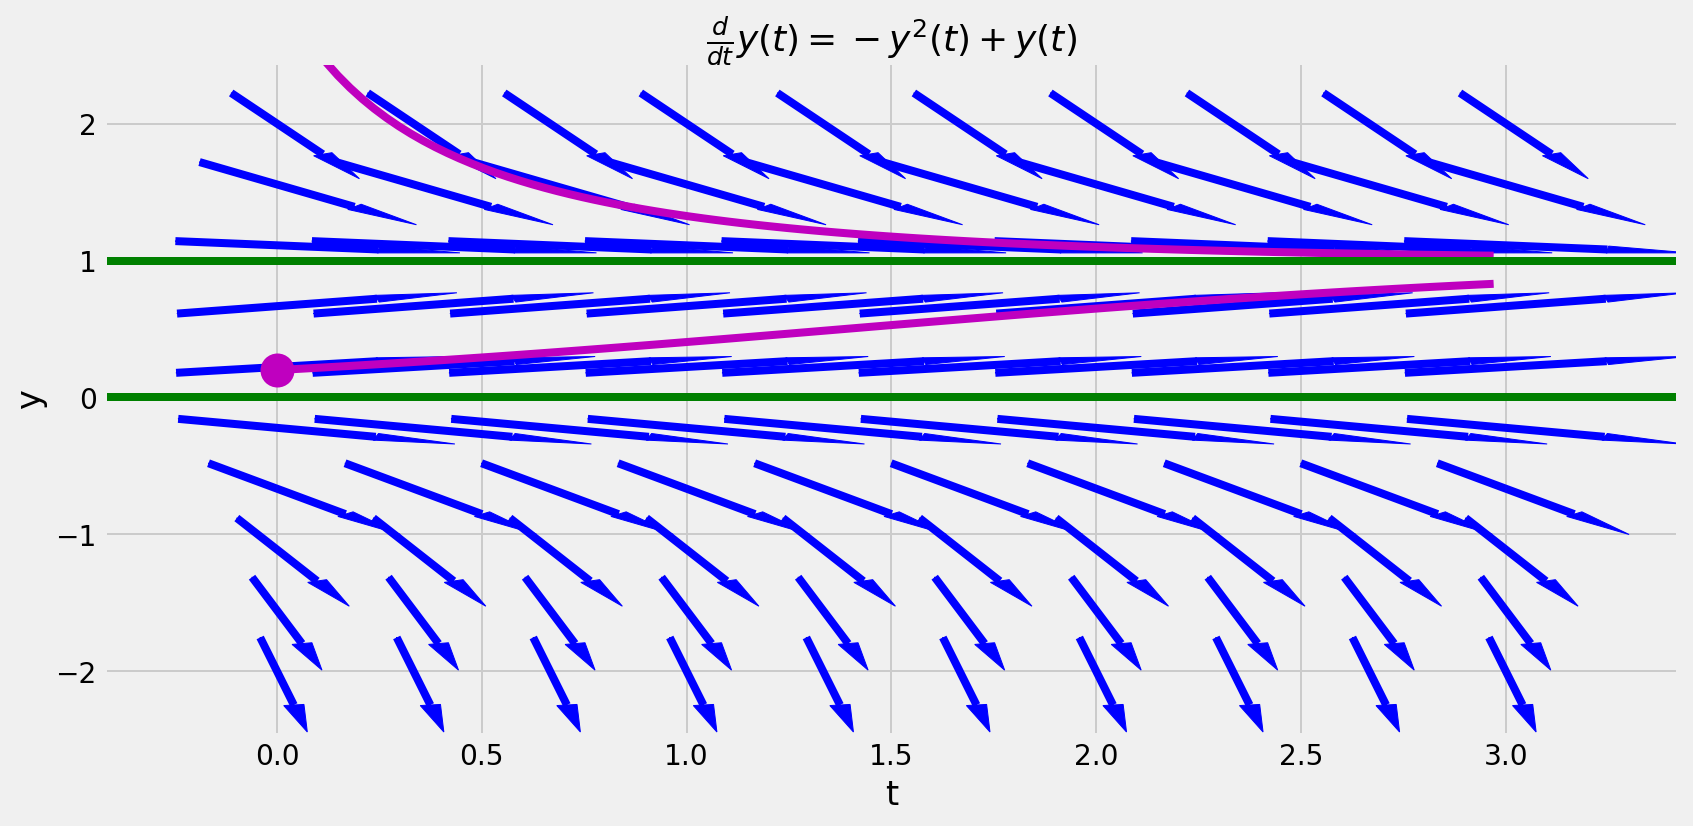

In [12]:
fig, ax = plt.subplots( figsize=(12, 6))

tl=0;tu=3;yl =-2;yu=2;tstep = (tu-tl)/101

#					I. direction field
plot_direction_field(t, y(t), ode.rhs, x_lim=(tl, tu), y_lim=(yl, yu),
                     head_width=0.05, ax = ax)

#					II. Dot at given (x0,y0) and solution curve through (x0,y0)
t0=0; y00=0.2
ax.plot([t0],[y00],'mo',markersize = 16) # 'm'agenta d'o't
#X=np.linspace(t0,4,101)  # t[0]=t0, .., t[100]=4.
X=np.arange(t0,tu,tstep) 
#Y=[f_exact(t,y0) for t in X]
Y=f_exact(X,y00)

ax.plot(X,Y,'m',linewidth=4) # lines joining points (X[i],Y[i]), 'm'agenta

#					II. Dot at given (x0,y0) and solution curve through (x0,y0)
t0=0; y00=3
ax.plot([t0],[y00],'mo',markersize = 16) # 'm'agenta d'o't
#X=np.linspace(t0,4,101)  # t[0]=t0, .., t[100]=4.
X=np.arange(t0,tu,tstep) 
#Y=[f_exact(t,y0) for t in X]
Y=f_exact(X,y00)

ax.plot(X,Y,'m',linewidth=4) # lines joining points (X[i],Y[i]), 'm'agenta

#					III. HORIZONTAL STEADY STATE

plt.axhline(y=1, xmin=0, xmax=3, linewidth=4, color = 'g')
plt.axhline(y=0, xmin=0, xmax=3, linewidth=4, color = 'g')

ax.set_xlabel("t")
ax.set_ylabel("y")

fig.tight_layout()

## Example 3: Nonautonomous DE 
###  Isoclines f(t,y) = constant, 
### same arrows along isoclines

Differential equation:


d                      
──(y(t)) = t - y(t) + 1
dt                     

General solution:


       ⎛        t⎞  -t
y(t) = ⎝C₁ + t⋅ℯ ⎠⋅ℯ  

Solve C1 for y0:


y₀

Solution with y0:


       ⎛   t     ⎞  -t
y(t) = ⎝t⋅ℯ  + y₀⎠⋅ℯ  

numpy function of t and y0


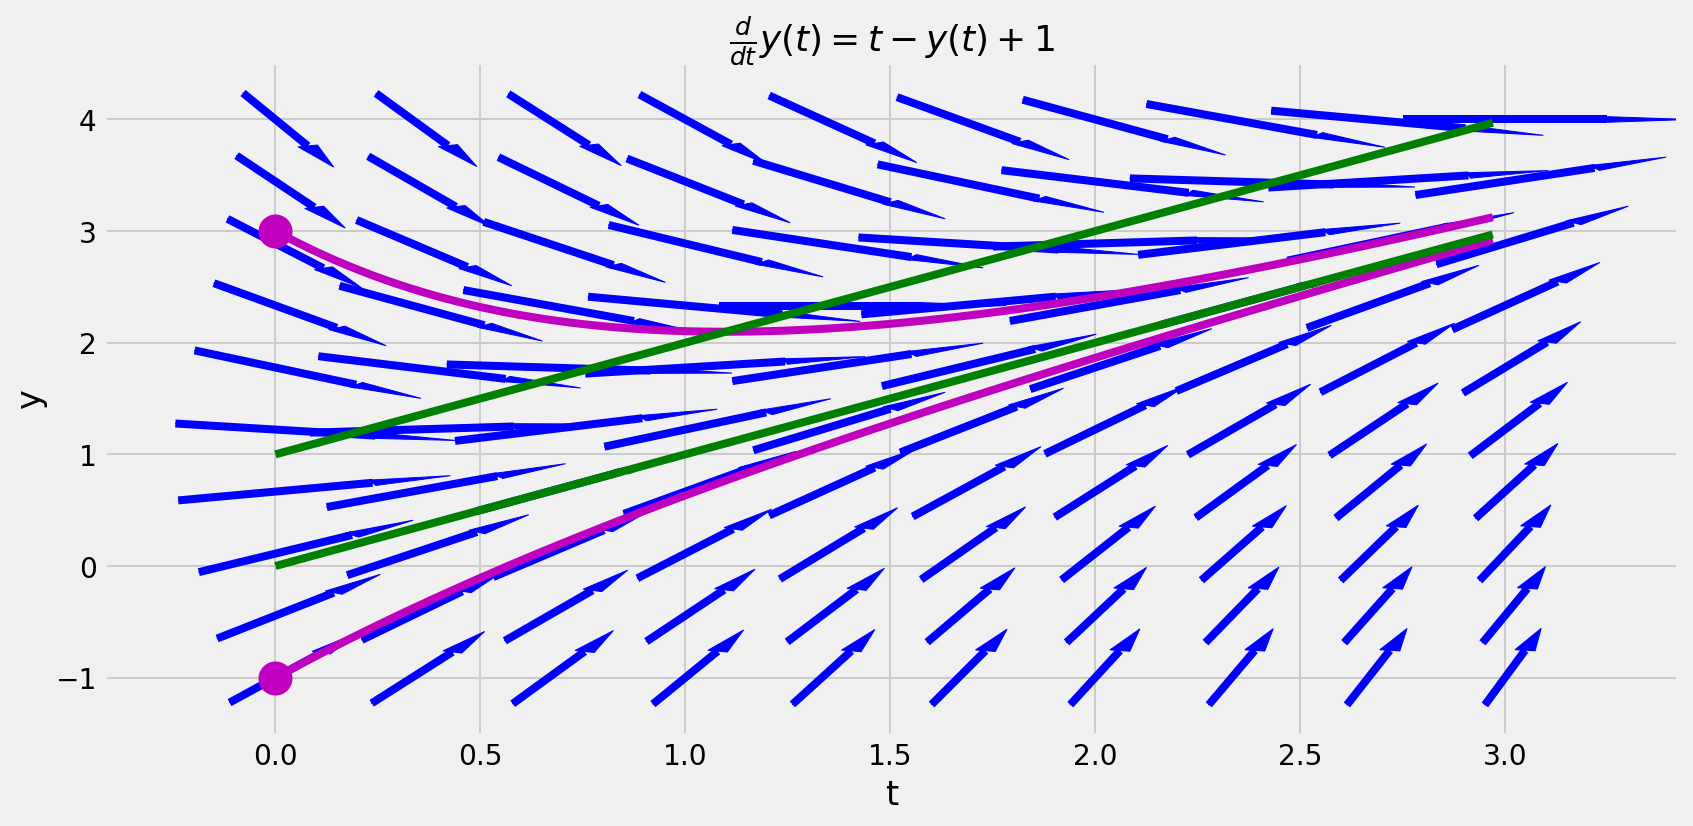

In [13]:
# reinitiate the symbols
x, t, C1,y0= sympy.symbols("x, t,C1, y0") # C1 is C1 NOT C_1, no need _
y = sympy.Function("y")

print("Differential equation:")
ode = sympy.Eq(y(t).diff(t), 1 +t-y(t))
display(ode)
#
print("General solution:")
sol = sympy.dsolve(ode, y(t))
display(sol)
# solve C1 under initial condition with known y0 
print("Solve C1 for y0:")
C1_ic = solve(sol.rhs.subs({t:0})-y0,C1)[0]
display(C1_ic)
# substitute C1 by y0
print("Solution with y0:")
sol = sol.subs({C1:C1_ic})
display(sol)
print("numpy function of t and y0")
f_exact = sympy.lambdify((t, y0), sol.rhs, 'numpy') # numpy funciton of t and y0
f_exact

fig, ax = plt.subplots( figsize=(12, 6))

tl=0;tu=3;yl =-1;yu=4;tstep = (tu-tl)/101

#					I. direction field
plot_direction_field(t, y(t), ode.rhs, x_lim=(tl, tu), y_lim=(yl, yu),
                     head_width=0.05, ax = ax)

#					II. Dot at given (x0,y0) and solution curve through (x0,y0)
t0=0; y00=-1
ax.plot([t0],[y00],'mo',markersize = 16) # 'm'agenta d'o't
#X=np.linspace(t0,4,101)  # t[0]=t0, .., t[100]=4.
X=np.arange(t0,tu,tstep) 
#Y=[f_exact(t,y0) for t in X]
Y=f_exact(X,y00)

ax.plot(X,Y,'m',linewidth=4) # lines joining points (X[i],Y[i]), 'm'agenta

#					II. Dot at given (x0,y0) and solution curve through (x0,y0)
t0=0; y00=3
ax.plot([t0],[y00],'mo',markersize = 16) # 'm'agenta d'o't
#X=np.linspace(t0,4,101)  # t[0]=t0, .., t[100]=4.
X=np.arange(t0,tu,tstep) 
#Y=[f_exact(t,y0) for t in X]
Y=f_exact(X,y00)

ax.plot(X,Y,'m',linewidth=4) # lines joining points (X[i],Y[i]), 'm'agenta

#					III. Isoclines

ax.plot(X, X,  linewidth=4, color = 'g')
ax.plot(X, X+1,  linewidth=4, color = 'g')

ax.set_xlabel("t")
ax.set_ylabel("y")

fig.tight_layout()


## Example 4: Linear System of DE and  Stability
### Source, Sink and Saddle
### Second order ODE = Two First Order Equations = System of Equations

$$y'' + B y' + Cy=0$$

$$ \frac{d}{dt}\begin{bmatrix}y\\y'\end{bmatrix} = \begin{bmatrix}0 & 1\\-C & -B\end{bmatrix} \begin{bmatrix}y\\y'\end{bmatrix}$$

assume $y = e^{st}$

$$s^2 + B s + C=0$$

Characteristic equation for a Eigenvalue problem.


Exponents $s_1$ ,$s_2$ are Eigenvalues $\lambda_i$ of companion matrix.

$$A = \begin{bmatrix}0 & 1\\-C & -B\end{bmatrix}$$

Stability = B >0 , C> 0 ; Then Real(s1)<0, Real(s2)<0.



### General Form for Two First Order Equations

$$ \frac{d}{dt}\begin{bmatrix} y_1\\ y_2  \end{bmatrix} = \begin{bmatrix}a_{11} & a_{12}\\a_{21} & a_{22}\end{bmatrix} \begin{bmatrix}y_1\\y_2\end{bmatrix}$$

matrix form

$$\mathbf y' = \mathbf A \mathbf y$$

We can guess one solution like:

$\mathbf y_1 = e^{\lambda_1 t} \mathbf v_1$


where $$A \mathbf v_1 = \lambda_1 \mathbf v_1$$


since 

$$ \frac{d}{dt} \mathbf y_1 = \lambda_1 e^{\lambda_1 t} \mathbf v_1 = \mathbf A e^{\lambda_1 t} \mathbf v_1$$

so $ \mathbf y_1$ satisfies:

$$\mathbf y' = \mathbf A \mathbf y$$

And then the general solution

$$\mathbf y =C_1 e^{\lambda_1 t} \mathbf v_1 + C_2 e^{\lambda_2 t} \mathbf v_2$$

which depends how many eigenvalues and whether they are real or complex numbers.

ref:

https://www.youtube.com/watch?v=fd7ioT_wwPE&index=30&list=PLYmwFR_XLSpYpYNlNI8gRn7QImUZvkqK0

### sketching phase portraits

https://www.youtube.com/watch?v=dpbRUQ-5YWc

![](https://i.ytimg.com/vi/dpbRUQ-5YWc/maxresdefault.jpg)


### Linear Systems of Differential Equations

Many solutions to D.E’s can be modeled by one of the following trajectories (images borrowed from Dr. Paul Dawkins)


![](https://jmckennonmth212s09.files.wordpress.com/2009/02/graphs.jpg)


ref:

https://jmckennonmth212s09.wordpress.com/2009/02/07/linear-systems-of-differential-equations/




### Source

$s_1$ and $s_2$ $>0$ is source. and $s_1$ and $s_2$ $<0$ is sink.

http://m.wolframalpha.com/input/?i=solve+y%27%27-3y%27%2B2y%3D0


![](https://i.ytimg.com/vi/VqXKa11IA6A/maxresdefault.jpg)

In [14]:
# reinitiate the symbols
x, t, C1,C2,y0= sympy.symbols("x, t,C1,C2, y0") # C1 is C1 NOT C_1, no need _
y = sympy.Function("y")

print("Differential equation:")
ode = sympy.Eq(y(t).diff(t,2)-3*y(t).diff(t)+2*y(t)) # damping term is -3, so diverse
display(ode)
#
print("General solution:")
sol = sympy.dsolve(ode, y(t))
display(sol)

Differential equation:


                        2          
           d           d           
2⋅y(t) - 3⋅──(y(t)) + ───(y(t)) = 0
           dt           2          
                      dt           

General solution:


       ⎛         t⎞  t
y(t) = ⎝C₁ + C₂⋅ℯ ⎠⋅ℯ 

#### Assume C1, C2 = 1

In [18]:
y_t = sympy.lambdify(t, sol.rhs.subs({C1:1,C2:1}), 'numpy')
yp_t = sympy.lambdify(t, sol.rhs.diff(t).subs({C1:1,C2:1}), 'numpy')

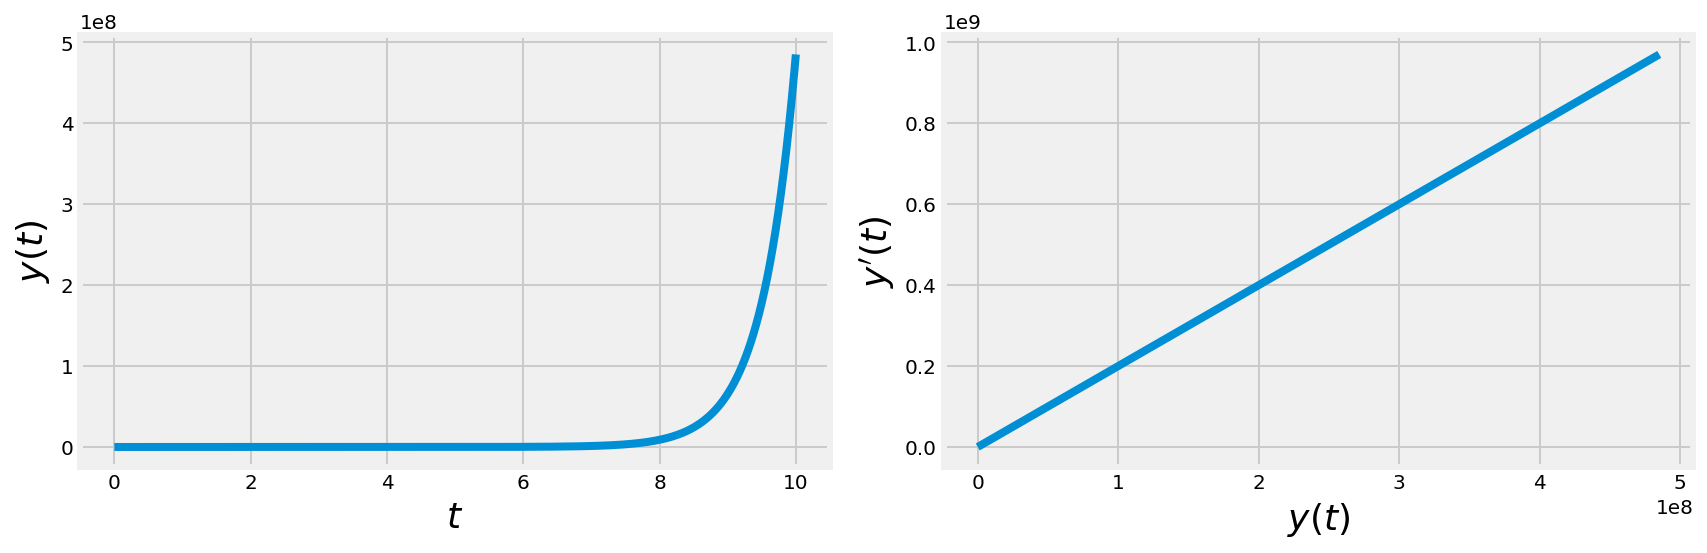

In [19]:
fig, ax = plt.subplots(1,2,figsize=(12, 4))

tt = np.linspace(0, 10, 500)
ax[0].plot(tt, y_t(tt).real)
ax[0].set_xlabel(r"$t$", fontsize=18)
ax[0].set_ylabel(r"$y(t)$", fontsize=18)

ax[1].plot( y_t(tt).real, yp_t(tt).real)
ax[1].set_xlabel(r"$y(t)$", fontsize=18)
ax[1].set_ylabel(r"$y'(t)$", fontsize=18)

fig.tight_layout()

### Saddle

$s_1>0$ and $s_2<0$ 

http://m.wolframalpha.com/input/?i=solve+y%27%27-4y%3D0



![](http://demonstrations.wolfram.com/PhasePortraitsEigenvectorsAndEigenvalues/HTMLImages/index.en/popup_2.jpg)

In [20]:
# reinitiate the symbols
x, t, C1,C2,y0= sympy.symbols("x, t,C1,C2, y0") # C1 is C1 NOT C_1, no need _
y = sympy.Function("y")

print("Differential equation:")
ode = sympy.Eq(y(t).diff(t,2)-4*y(t)) # damping term is -3, so diverse
display(ode)
#
print("General solution:")
sol = sympy.dsolve(ode, y(t))
display(sol)

print(r"First order differential $y'$:")
display(sol.rhs.diff(t))

Differential equation:


            2          
           d           
-4⋅y(t) + ───(y(t)) = 0
            2          
          dt           

General solution:


           -2⋅t       2⋅t
y(t) = C₁⋅ℯ     + C₂⋅ℯ   

First order differential $y'$:


        -2⋅t         2⋅t
- 2⋅C₁⋅ℯ     + 2⋅C₂⋅ℯ   

#### Assume C1, C2 = -1

In [21]:
y_t = sympy.lambdify(t, sol.rhs.subs({C1:-1,C2:-1}), 'numpy')
yp_t = sympy.lambdify(t, sol.rhs.diff(t).subs({C1:-1,C2:-1}), 'numpy')

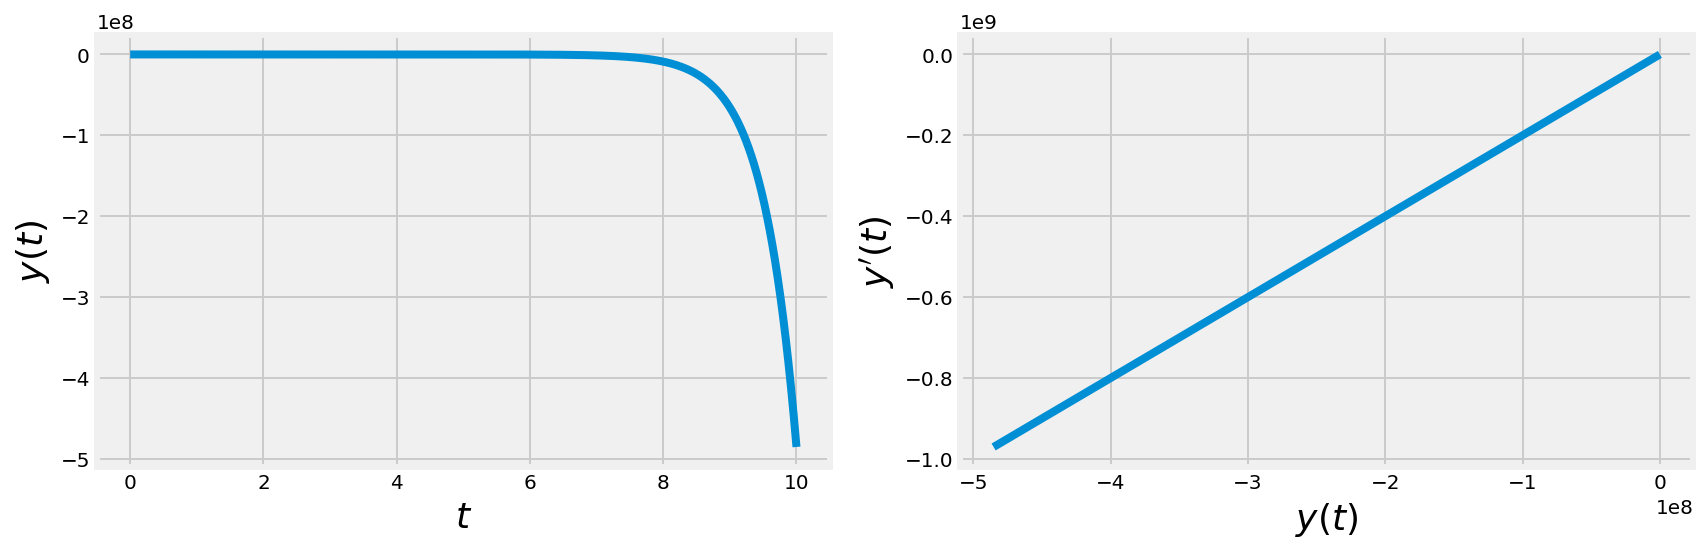

In [22]:
fig, ax = plt.subplots(1,2,figsize=(12, 4))

tt = np.linspace(0, 10, 500)
ax[0].plot(tt, y_t(tt).real)
ax[0].set_xlabel(r"$t$", fontsize=18)
ax[0].set_ylabel(r"$y(t)$", fontsize=18)

ax[1].plot( y_t(tt).real, yp_t(tt).real)
ax[1].set_xlabel(r"$y(t)$", fontsize=18)
ax[1].set_ylabel(r"$y'(t)$", fontsize=18)

fig.tight_layout()

### Spiral


$s = a +  i \omega $ for $B^2 < 4AC$.


$$y = e^{(a+i\omega)t}$$

Spiral source: $a>0, B<0$;

Center: $a=0 $, No damping;

Spiarl sink: $a<0$,   Underdamping


![](http://demonstrations.wolfram.com/PhasePortraitsEigenvectorsAndEigenvalues/HTMLImages/index.en/popup_3.jpg)

### Center
http://www.wolframalpha.com/input/?i=solve+y%27%27+%2Bw%5E2*y+%3D+0



![](https://www.mathworks.com/content/dam/mathworks/videos/d/4724760451001/jcr:content/renditions/Thumbnail.11.640.360.jpg)

In [23]:
# reinitiate the symbols
x, t, C1,C2,omeg= sympy.symbols("x, t,C1, C2, omega") # C1 is C1 NOT C_1, no need _
y = sympy.Function("y")

print("Differential equation:")
ode = sympy.Eq(y(t).diff(t,2)+ omeg**2*y(t)) # damping term is -3, so diverse
display(ode)
#
print("General solution:")
sol = sympy.dsolve(ode, y(t))
display(sol)

print(r"First order differential $y'$:")
display(sol.rhs.diff(t))

Differential equation:


            2          
 2         d           
ω ⋅y(t) + ───(y(t)) = 0
            2          
          dt           

General solution:


           -ⅈ⋅ω⋅t       ⅈ⋅ω⋅t
y(t) = C₁⋅ℯ       + C₂⋅ℯ     

First order differential $y'$:


          -ⅈ⋅ω⋅t           ⅈ⋅ω⋅t
- ⅈ⋅C₁⋅ω⋅ℯ       + ⅈ⋅C₂⋅ω⋅ℯ     

### Spiral sink

![](http://www4d.wolframalpha.com/Calculate/MSP/MSP2079116hf4d8i20fai54000016ic6ggiga8f6558?MSPStoreType=image/gif&s=33&w=162.&h=18.)
http://m.wolframalpha.com/input/?i=solve+y%27%27%2B2y%27%2B2y%3D0



![](http://demonstrations.wolfram.com/PhasePortraitsEigenvectorsAndEigenvalues/HTMLImages/index.en/popup_1.jpg)

In [24]:
# reinitiate the symbols
x, t, C1,C2,omeg= sympy.symbols("x, t,C1, C2,omega") # C1 is C1 NOT C_1, no need _
y = sympy.Function("y")

print("Differential equation:")
ode = sympy.Eq(y(t).diff(t,2)+ 2*y(t).diff(t) +2*y(t)) # damping term is -3, so diverse
display(ode)
#
print("General solution:")
sol = sympy.dsolve(ode, y(t))
display(sol)

print(r"First order differential $y'$:")
display(sol.rhs.diff(t))

Differential equation:


                        2          
           d           d           
2⋅y(t) + 2⋅──(y(t)) + ───(y(t)) = 0
           dt           2          
                      dt           

General solution:


                                -t
y(t) = (C₁⋅sin(t) + C₂⋅cos(t))⋅ℯ  

First order differential $y'$:


                           -t                            -t
- (C₁⋅sin(t) + C₂⋅cos(t))⋅ℯ   + (C₁⋅cos(t) - C₂⋅sin(t))⋅ℯ  

#### Assume C1, C2 = -1

In [25]:

y_t = sympy.lambdify(t, sol.rhs.subs({C1:-1,C2:-1}), 'numpy')
yp_t = sympy.lambdify(t, sol.rhs.diff(t).subs({C1:-1,C2:-1}), 'numpy')

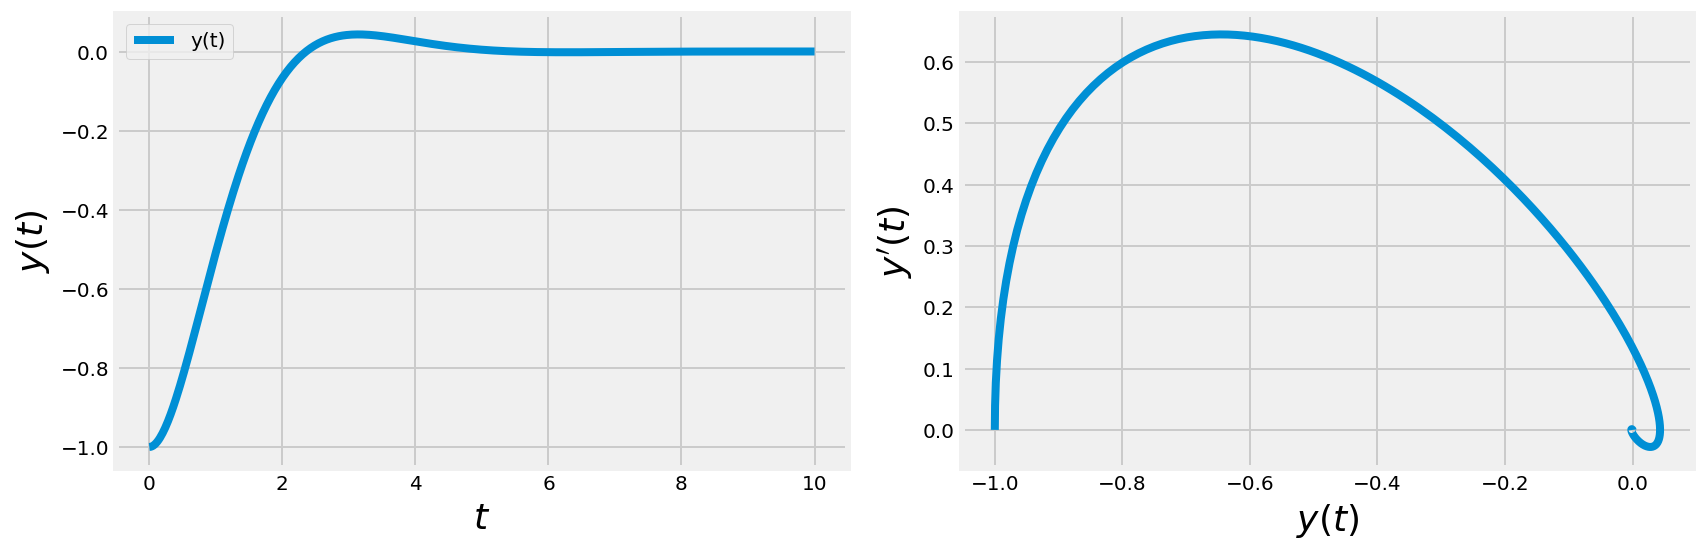

In [27]:
fig, ax = plt.subplots(1,2,figsize=(12, 4))

tt = np.linspace(0, 10, 500)
ax[0].plot(tt, y_t(tt).real, label = r"y(t)")
ax[0].set_xlabel(r"$t$", fontsize=18)
ax[0].set_ylabel(r"$y(t)$", fontsize=18)
ax[0].legend()
ax[1].plot( y_t(tt).real, yp_t(tt).real)
ax[1].set_xlabel(r"$y(t)$", fontsize=18)
ax[1].set_ylabel(r"$y'(t)$", fontsize=18)
#ax[1].legend()
fig.tight_layout()

### Spiral source

![](http://www4f.wolframalpha.com/Calculate/MSP/MSP14341b8e5a33cb21fhff0000269eeadfa97ab142?MSPStoreType=image/gif&s=55&w=162.&h=18.)
http://m.wolframalpha.com/input/?i=solve+y%27%27-2y%27%2B2y%3D0

In [28]:
# reinitiate the symbols
x, t, C1,C2,omeg= sympy.symbols("x, t,C1, C2,omega") # C1 is C1 NOT C_1, no need _
y = sympy.Function("y")

print("Differential equation:")
ode = sympy.Eq(y(t).diff(t,2)- 2*y(t).diff(t) +2*y(t)) # damping term is -3, so diverse
display(ode)
#
print("General solution:")
sol = sympy.dsolve(ode, y(t))
display(sol)

print(r"First order differential $y'$:")
display(sol.rhs.diff(t))

Differential equation:


                        2          
           d           d           
2⋅y(t) - 2⋅──(y(t)) + ───(y(t)) = 0
           dt           2          
                      dt           

General solution:


                                t
y(t) = (C₁⋅sin(t) + C₂⋅cos(t))⋅ℯ 

First order differential $y'$:


                         t                            t
(C₁⋅sin(t) + C₂⋅cos(t))⋅ℯ  + (C₁⋅cos(t) - C₂⋅sin(t))⋅ℯ 

#### Assume C1, C2 = 1

In [29]:

y_t = sympy.lambdify(t, sol.rhs.subs({C1:1,C2:1}), 'numpy')
yp_t = sympy.lambdify(t, sol.rhs.diff(t).subs({C1:1,C2:1}), 'numpy')

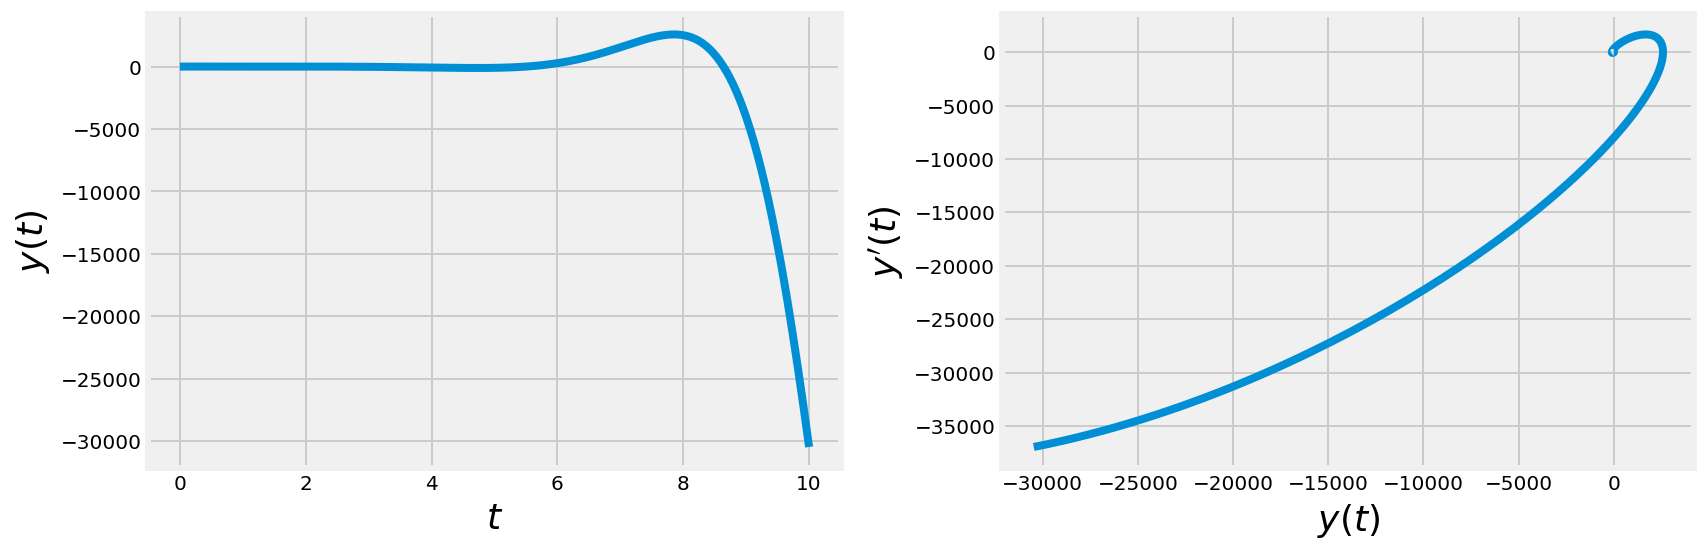

In [30]:
fig, ax = plt.subplots(1,2,figsize=(12, 4))

tt = np.linspace(0, 10, 500)
ax[0].plot(tt, y_t(tt).real)
ax[0].set_xlabel(r"$t$", fontsize=18)
ax[0].set_ylabel(r"$y(t)$", fontsize=18)

ax[1].plot( y_t(tt).real, yp_t(tt).real)
ax[1].set_xlabel(r"$y(t)$", fontsize=18)
ax[1].set_ylabel(r"$y'(t)$", fontsize=18)

fig.tight_layout()

## Numerical integration of ODEs using SciPy
Integrating differential equations
scipy.integrate also features routines for integrating Ordinary Differential Equations (ODE). In particular, scipy.integrate.odeint() solves ODE of the form:

$$dy/dt = rhs(y1, y2, .., t0,...)$$

http://www.scipy-lectures.org/intro/scipy.html#integrating-differential-equations

In [31]:
import scipy as sp
from scipy import integrate 

In [32]:
# reinitiate the symbols
x, t, C1,C2,omeg= sympy.symbols("x, t,C1, C2,omega") # C1 is C1 NOT C_1, no need _
y = sympy.Function("y")
print("Differential equation:")
ode = sympy.Eq(y(t).diff(t,2)- 2*y(t).diff(t) +2*y(t)) # damping term is -3, so diverse
display(ode)
#
print("General solution:")
sol = sympy.dsolve(ode, y(t))
display(sol)

Differential equation:


                        2          
           d           d           
2⋅y(t) - 2⋅──(y(t)) + ───(y(t)) = 0
           dt           2          
                      dt           

General solution:


                                t
y(t) = (C₁⋅sin(t) + C₂⋅cos(t))⋅ℯ 

#### A 2nd order ode can be solved as a two 1st order linear ode system

$$y'' + B y' + Cy=0$$

$$ \frac{d}{dt}\begin{bmatrix}y\\y'\end{bmatrix} = \begin{bmatrix}0 & 1\\-C & -B\end{bmatrix} \begin{bmatrix}y\\y'\end{bmatrix}$$


In [33]:
def odesystem(u,t):
    y = u[0]
    yp = u[1]
    return (yp,-2*y+2*yp)

#### Initial conditions, or parameter(s)

In [34]:
y0 = 2
yp0 = 0
u0 = sp.array([y0,yp0])

In following cell:
- Choose points for output.<br>
- Integrate.<br>
<b>Note:</b> `odeint` returns an array:<br>
  `[[y_0  yp_0],`<br>
  `[y_1  yp_1],`<br>
  `[y_2  yp_2], ...]`<br>
  To get single list for `y` and single list for `yp` we need the transpose of the returned array.<br>
  (Could also keep return as a single array if that's more useful down the road.)

In [35]:
t = sp.linspace(0,5,201)  # NOTE: The  points selected for plotting are 
                           # not the points used for the numerical 
                           # evalution.
y, yp = sp.integrate.odeint(odesystem,u0,t).T

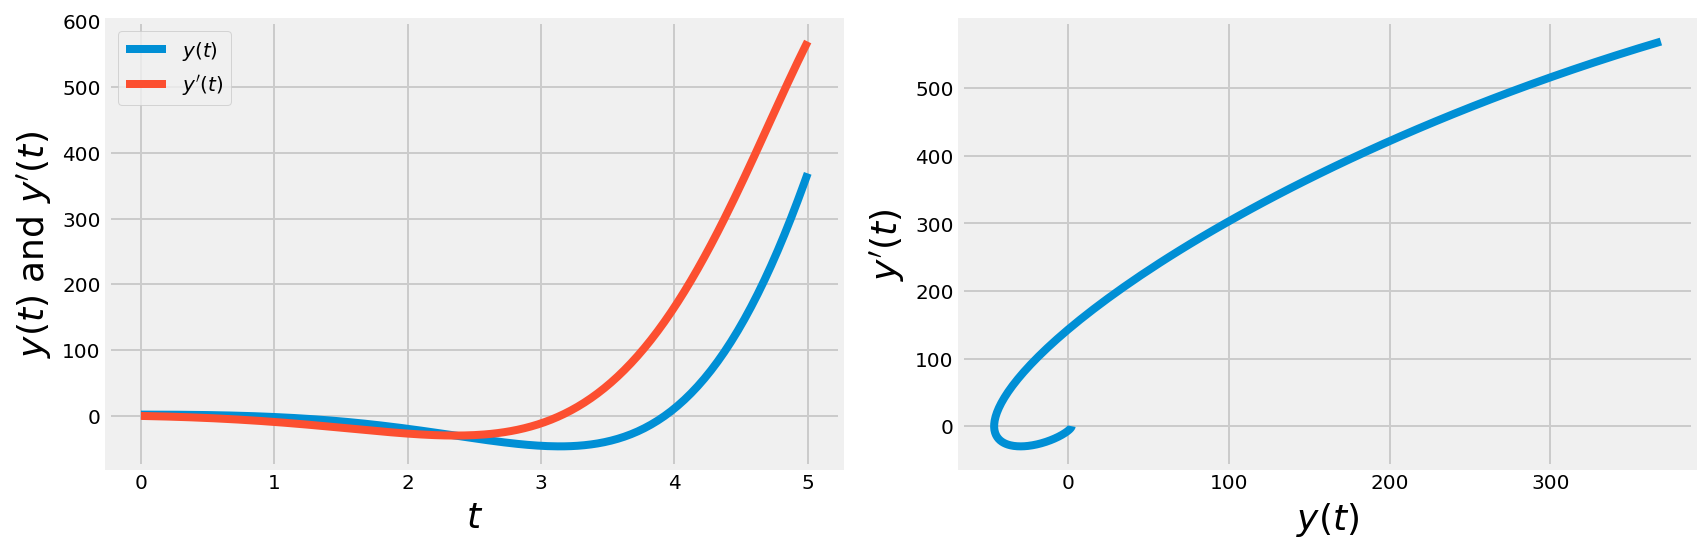

In [36]:
fig, ax = plt.subplots(1,2,figsize=(12, 4))

tt = np.linspace(0, 10, 500)
ax[0].plot(t, y,label = "$y(t)$")
ax[0].plot(t, yp,label = "$y'(t)$")
ax[0].set_xlabel(r"$t$", fontsize=18)
ax[0].set_ylabel(r"$y(t)$ and $y'(t)$", fontsize=18)
ax[0].legend()

ax[1].plot( y, yp)
ax[1].set_xlabel(r"$y(t)$", fontsize=18)
ax[1].set_ylabel(r"$y'(t)$", fontsize=18)

fig.tight_layout()

# System of ODE
## Lotka-Volterra equations for predator(fox)/pray(rabbit) populations

$$
x'(t) = a x - b x y
$$

$$
y'(t) = c x y - d y
$$

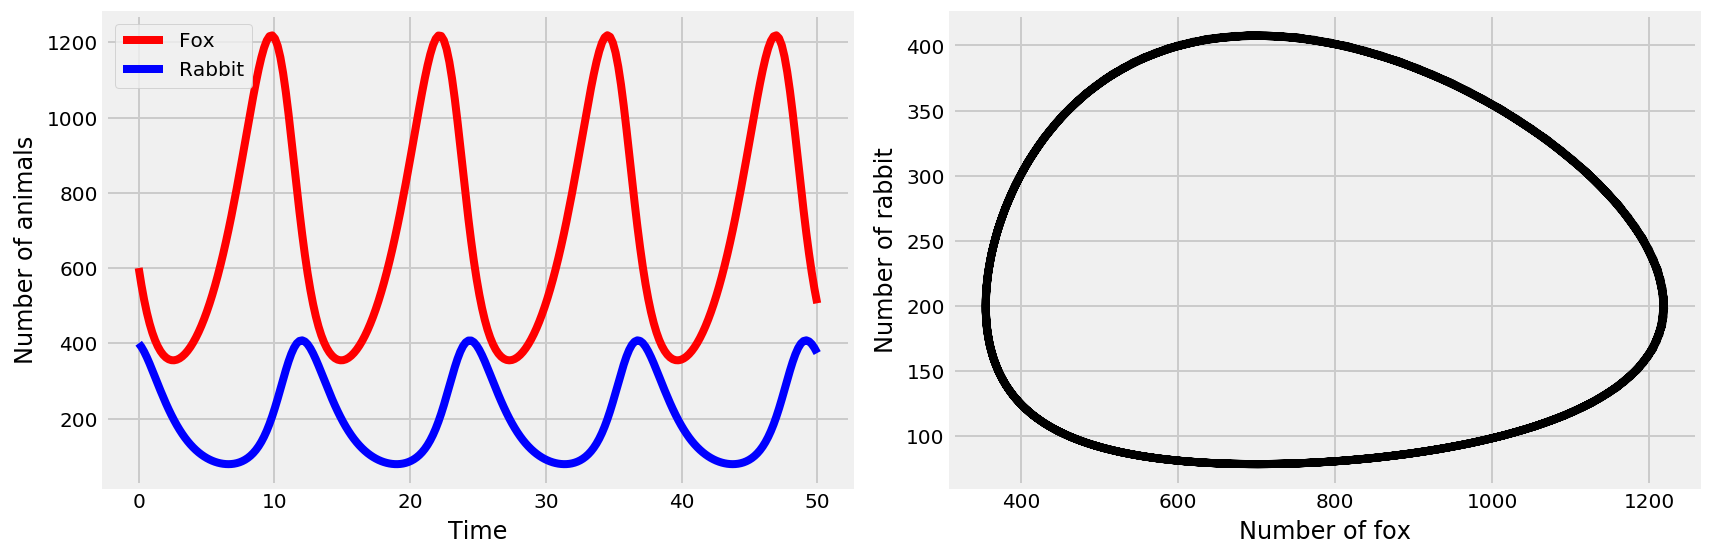

In [37]:
a, b, c, d = 0.4, 0.002, 0.001, 0.7
def f(xy, t):
    x, y = xy
    return [a * x - b * x * y,
            c * x * y - d * y]

xy0 = [600, 400]

t = np.linspace(0, 50, 250)

xy_t = integrate.odeint(f, xy0, t)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(t, xy_t[:,0], 'r', label="Fox")
axes[0].plot(t, xy_t[:,1], 'b', label="Rabbit")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Number of animals")
axes[0].legend()

axes[1].plot(xy_t[:,0], xy_t[:,1], 'k')
axes[1].set_xlabel("Number of fox")
axes[1].set_ylabel("Number of rabbit")
fig.tight_layout()

# Nonlinear DE
## Linearization at Critical Points/Steady States


$$\frac{dy}{dt}  = f(Y) = 0 $$

$y(t) = Y$ is steady state: **STABLE** ? **converge**?

**Linearize** around the station/critical points. 

**zoom in**

$$f(y) = f(Y) + (y-Y)\frac{df}{dy} = (y-Y)\frac{df}{dy}  $$
 
 
Then 

$$\frac{dy}{dt}= (y-Y)\frac{df}{dy}$$

and

$$\frac{d}{dt}(y-Y)= a (y-Y), \ \, \quad where \quad a = \frac{df}{dy}$$

$$y-Y = C e^{at}$$

ref:

https://www.youtube.com/watch?v=0hx59wYpFyY&list=PLYmwFR_XLSpYpYNlNI8gRn7QImUZvkqK0&index=31

In [1]:
from IPython.core.display import HTML, Image
css_file = '../../../../custom.css'
HTML(open(css_file, 'r').read())